<a href="https://colab.research.google.com/github/Leungy/QTW-/blob/master/Case3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
 
import numpy.lib.recfunctions as rfn 
from collections import OrderedDict
import csv
 
from itertools import product
from sklearn import datasets
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.base import BaseEstimator

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
from google.colab import files
data_to_load = files.upload()

Saving data.csv to data.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(data_to_load['data.csv']))

In [7]:
# List Missing Values per column
df.isnull().sum()

Unnamed: 0         0
isSpam             0
isRe               0
underscore         0
priority           0
isInReplyTo        0
sortedRec          0
subPunc            0
multipartText      0
hasImages          0
isPGPsigned        0
subSpamWords       7
noHost             1
numEnd             0
isYelling          7
isOrigMsg          0
isDear             0
isWrote            0
numLines           0
bodyCharCt         0
subExcCt          20
subQuesCt         20
numAtt             0
numRec           282
perCaps            0
hour               0
perHTML            0
subBlanks         20
forwards           0
avgWordLen         0
numDlr             0
dtype: int64

In [8]:
df.head(2)

,Unnamed: 0,isSpam,isRe,underscore,priority,isInReplyTo,sortedRec,subPunc,multipartText,hasImages,isPGPsigned,subSpamWords,noHost,numEnd,isYelling,isOrigMsg,isDear,isWrote,numLines,bodyCharCt,subExcCt,subQuesCt,numAtt,numRec,perCaps,hour,perHTML,subBlanks,forwards,avgWordLen,numDlr
0,./Unit6//messages/easy_ham1,F,T,F,F,T,T,F,F,F,F,F,F,F,F,F,F,F,50,1554,0.0,0.0,0,2.0,4.451039,11,0.0,12.5,0.0,4.376623,3
1,./Unit6//messages/easy_ham2,F,F,F,F,F,T,F,F,F,F,F,F,F,F,F,F,F,26,873,0.0,0.0,0,1.0,7.491289,11,0.0,8.0,0.0,4.555556,0


In [9]:
# replace T/F with 1/0
df.replace('T', 1, inplace=True)
df.replace('F', 0, inplace=True)

In [10]:
df.head(2)

,Unnamed: 0,isSpam,isRe,underscore,priority,isInReplyTo,sortedRec,subPunc,multipartText,hasImages,isPGPsigned,subSpamWords,noHost,numEnd,isYelling,isOrigMsg,isDear,isWrote,numLines,bodyCharCt,subExcCt,subQuesCt,numAtt,numRec,perCaps,hour,perHTML,subBlanks,forwards,avgWordLen,numDlr
0,./Unit6//messages/easy_ham1,0,1,0,0,1,1,0,0,0,0,0.0,0.0,0,0.0,0,0,0,50,1554,0.0,0.0,0,2.0,4.451039,11,0.0,12.5,0.0,4.376623,3
1,./Unit6//messages/easy_ham2,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0,0.0,0,0,0,26,873,0.0,0.0,0,1.0,7.491289,11,0.0,8.0,0.0,4.555556,0


In [11]:
# mean impute missing values [subExcCt, subQuesCt, numRec, subBlanks]

df['subExcCt'].fillna(df['subExcCt'].mean(), inplace=True)
df['subQuesCt'].fillna(df['subQuesCt'].mean(), inplace=True)
df['numRec'].fillna(df['numRec'].mean(), inplace=True)
df['subBlanks'].fillna(df['subBlanks'].mean(), inplace=True)


In [12]:
df.isnull().sum()

Unnamed: 0       0
isSpam           0
isRe             0
underscore       0
priority         0
isInReplyTo      0
sortedRec        0
subPunc          0
multipartText    0
hasImages        0
isPGPsigned      0
subSpamWords     7
noHost           1
numEnd           0
isYelling        7
isOrigMsg        0
isDear           0
isWrote          0
numLines         0
bodyCharCt       0
subExcCt         0
subQuesCt        0
numAtt           0
numRec           0
perCaps          0
hour             0
perHTML          0
subBlanks        0
forwards         0
avgWordLen       0
numDlr           0
dtype: int64

In [13]:
df2 =df.dropna()

In [14]:
df2 = df2.rename(columns = {'Unnamed: 0':'Msg_Type'})
df3 = df2.drop(columns=['Msg_Type'])

In [15]:
df3.head(2)

,isSpam,isRe,underscore,priority,isInReplyTo,sortedRec,subPunc,multipartText,hasImages,isPGPsigned,subSpamWords,noHost,numEnd,isYelling,isOrigMsg,isDear,isWrote,numLines,bodyCharCt,subExcCt,subQuesCt,numAtt,numRec,perCaps,hour,perHTML,subBlanks,forwards,avgWordLen,numDlr
0,0,1,0,0,1,1,0,0,0,0,0.0,0.0,0,0.0,0,0,0,50,1554,0.0,0.0,0,2.0,4.451039,11,0.0,12.5,0.0,4.376623,3
1,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0,0.0,0,0,0,26,873,0.0,0.0,0,1.0,7.491289,11,0.0,8.0,0.0,4.555556,0


In [16]:
df3.shape

(9340, 30)

In [17]:
# separate data into features(X) and label(y)
X=df3.drop(columns= ['isSpam']).to_numpy()
y=df3['isSpam'].to_numpy()

Find Feature Importance

Feature: 0, Score: 0.00037
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.03876
Feature: 4, Score: 0.00657
Feature: 5, Score: 0.00273
Feature: 6, Score: 0.01786
Feature: 7, Score: 0.00108
Feature: 8, Score: 0.00138
Feature: 9, Score: 0.00852
Feature: 10, Score: 0.00159
Feature: 11, Score: 0.02682
Feature: 12, Score: 0.01299
Feature: 13, Score: 0.00132
Feature: 14, Score: 0.02202
Feature: 15, Score: 0.00678
Feature: 16, Score: 0.08634
Feature: 17, Score: 0.11381
Feature: 18, Score: 0.02837
Feature: 19, Score: 0.00036
Feature: 20, Score: 0.00594
Feature: 21, Score: 0.01487
Feature: 22, Score: 0.26778
Feature: 23, Score: 0.01573
Feature: 24, Score: 0.10822
Feature: 25, Score: 0.05371
Feature: 26, Score: 0.05699
Feature: 27, Score: 0.03882
Feature: 28, Score: 0.06025


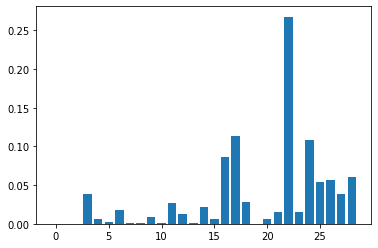

In [18]:
# Decision Tree Feature Importances
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.03075
Feature: 1, Score: 0.00955
Feature: 2, Score: 0.00127
Feature: 3, Score: 0.03839
Feature: 4, Score: 0.00625
Feature: 5, Score: 0.00243
Feature: 6, Score: 0.01713
Feature: 7, Score: 0.00103
Feature: 8, Score: 0.00065
Feature: 9, Score: 0.02395
Feature: 10, Score: 0.00117
Feature: 11, Score: 0.04462
Feature: 12, Score: 0.01871
Feature: 13, Score: 0.00196
Feature: 14, Score: 0.01786
Feature: 15, Score: 0.00804
Feature: 16, Score: 0.08142
Feature: 17, Score: 0.08870
Feature: 18, Score: 0.04136
Feature: 19, Score: 0.00631
Feature: 20, Score: 0.01016
Feature: 21, Score: 0.03165
Feature: 22, Score: 0.17578
Feature: 23, Score: 0.02877
Feature: 24, Score: 0.09830
Feature: 25, Score: 0.07252
Feature: 26, Score: 0.05825
Feature: 27, Score: 0.04678
Feature: 28, Score: 0.03625


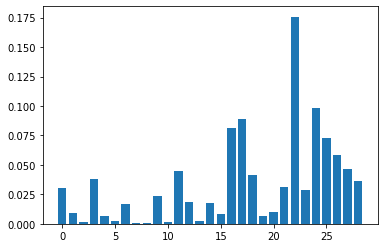

In [19]:
# Random Forest Feature Importances
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [20]:
#stratified k-fold 
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=1)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [   1    2    3 ... 9337 9338 9339] TEST: [   0    9   10 ... 9295 9316 9329]
TRAIN: [   0    1    2 ... 9337 9338 9339] TEST: [   3    4    7 ... 9331 9333 9336]
TRAIN: [   0    1    3 ... 9337 9338 9339] TEST: [   2   12   13 ... 9332 9334 9335]
TRAIN: [   0    2    3 ... 9334 9335 9336] TEST: [   1    5    6 ... 9337 9338 9339]


In [22]:
from sklearn.feature_selection import SelectFromModel
def select_features(_clf,X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectFromModel(_clf, max_features=10)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [23]:
#random forest train/test data after feature selection
X_train_fs, X_test_fs, fs = select_features(RandomForestClassifier(),X_train, y_train, X_test)

In [24]:
#decision tree train/test data after feature selection
X_train_dt_fs, X_test_dt_fs, dt_fs = select_features(DecisionTreeClassifier(),X_train, y_train, X_test)

In [25]:
#grid search via random forrest 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_fs, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [26]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [27]:
#Predict values based on best fitted parameters
rfc1=RandomForestClassifier(random_state=42, max_depth= 7, criterion='entropy')
rfc1.fit(X_train_fs, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
pred=rfc1.predict(X_test_fs)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9160599571734476


In [29]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state=0)

param_grid = { 
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']
}

CV_dt = GridSearchCV(estimator=decision_tree , param_grid=param_grid, cv= 5)
CV_dt.fit(X_train_dt_fs, y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7]},
             pr

In [30]:
CV_dt.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [31]:
CV_decision_tree=DecisionTreeClassifier(random_state=42, max_depth= 7, criterion='entropy')
CV_decision_tree.fit(X_train_dt_fs, y_train)

pred=CV_decision_tree.predict(X_test_dt_fs)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9044967880085653


In [ ]:
text_representation = tree.export_text(CV_decision_tree)
#print(text_representation)

In [32]:
!pip install graphviz
from matplotlib import pyplot as plt

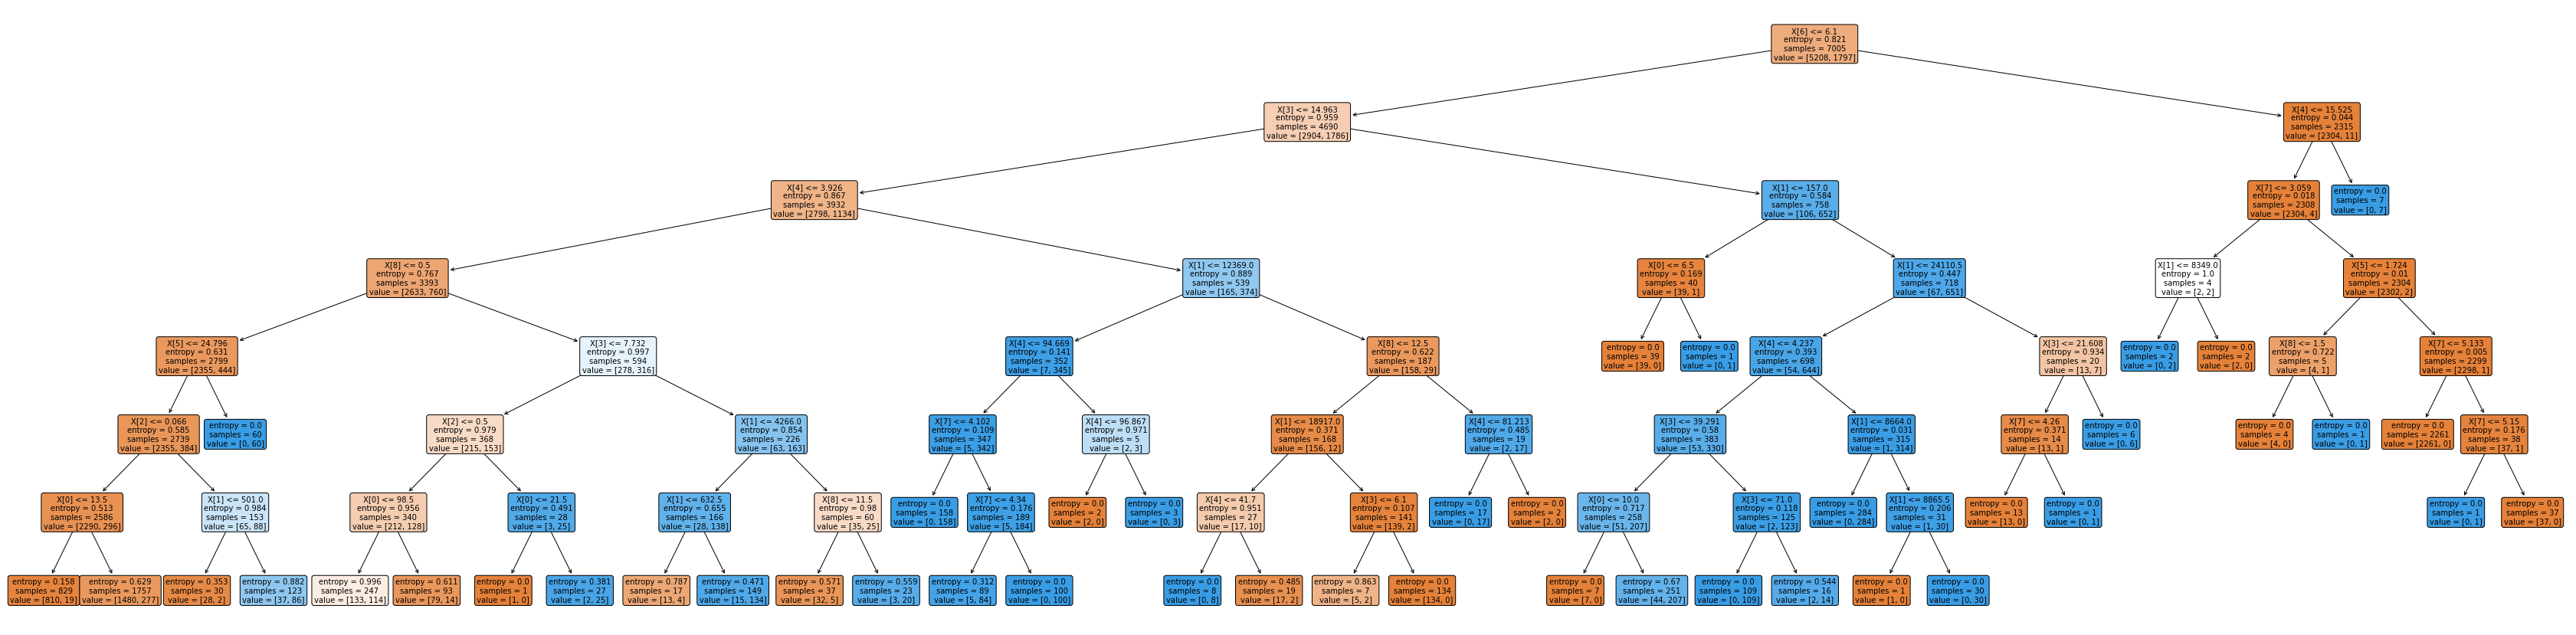

In [39]:
fig, ax = plt.subplots(figsize=(60, 15))
tree.plot_tree(CV_decision_tree.fit(X_train_dt_fs, y_train), max_depth= 7, filled=True, rounded=True,   fontsize=10)
plt.show()